# 4.1 분류 (Classification)의 개요

- 분류는 지도학습의 대표적인 유형이다
- 분류 알고리즘:
    - Naive Bayes: 통계와 생성 모델에 기반
    - Logistic Regression: 독립 변수와 종속변수의 선형 관계성 기반
    - Decision Tree: 데이터 균일도에 따른 규칙 기반
    - Support Vector Machine: 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주기
    - Nearest Neighbor: 근접 거리를 기반
    - Neural Network: 심층 연결 기반
    - Ensemble: 서로 다른/같은 알고리즘 결합
  

## 앙상블 방법 (Ensemble Method)

- 앙상블은 일반적으로 배깅(Bagging)과 부스팅(Boosting) 방식으로 나눈다.
    - 배깅: 뛰어난 예측 성능, 빠른 수행, 유연성
    - 부스팅: Gradient Boosting, XgBoost, LightGBM 등 활용도 높음

# 4.2 결정 트리

- 결정 트리: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다
  - 규칙 노드 : 규칙 조건이 되는 것
  - 리프 노드 : 결정된 클래스 값
  - 서브트리 : 새로운 규칙 조건마다 생성
  

<img src="./pics/4.2.png">

- 결정 노드: 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다

ex: 데이터 세트 C가 가장 균일도가 높고, 그다음은 B세트, 마지막으로는 A세트

<img src="./pics/4.2.1.png">

- 정보 균일도를 측정하는 방법:
    - 정보 이득: 엔트로피를 기반. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같으면 엔트로피가 낮다
    - 지니 계수: 0이 가장 평등, 1로 갈수록 불평등
- 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 **지니 계수**를 이용해 데이터 세트를 분할한다

## 결정 트리 모델 특징
- 장점:
    - '균일도'라는 룰을 기반으로 알고리즘이 쉽고 직관적이다
    - 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
- 단점: 과적합으로 정확도가 떨어진다

## 결정 트리 파라미터

- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하기 위해 사용됨
- min_samples_leaf: 분할이 될 경우 왼쪽과 오른 쪽의 브랜치 노드에서 가져야 할 최소의 샘플 데이터 수
- max_features: 최적의 분할을 위해 고려할 최대 피처 개수
- max_depth: 트리의 최대 깊이 지정
- max_leaf_nodes : 말단 노드(Leaf)의 최대 개수

## 결정 트리 모델의 시각화

- Graphviz 설치 --> https://graphviz.org/

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

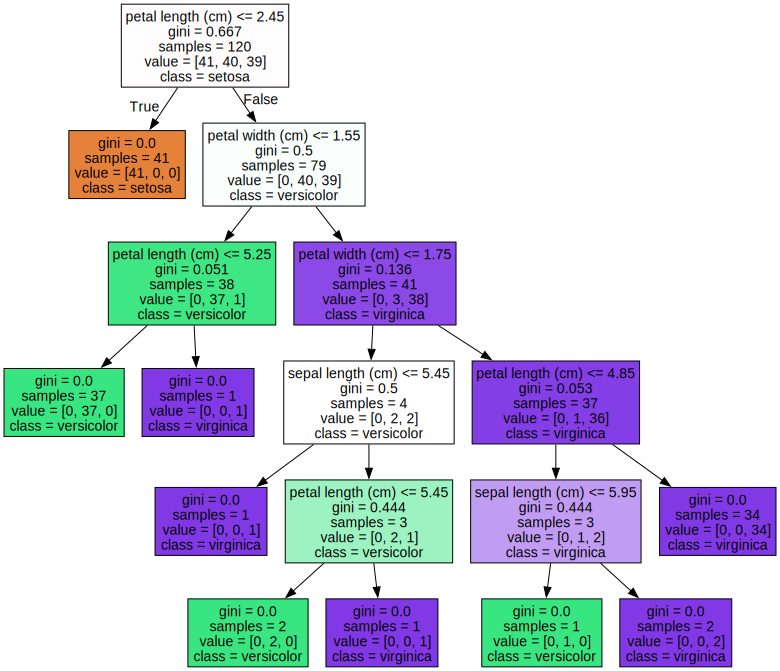

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 결정 트리의 과적합 (Overfitting)

- **1)** 먼저 make_classification() 통해 테스트용 데이터를 만들어 보겠습니다. make_classification() 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트다.

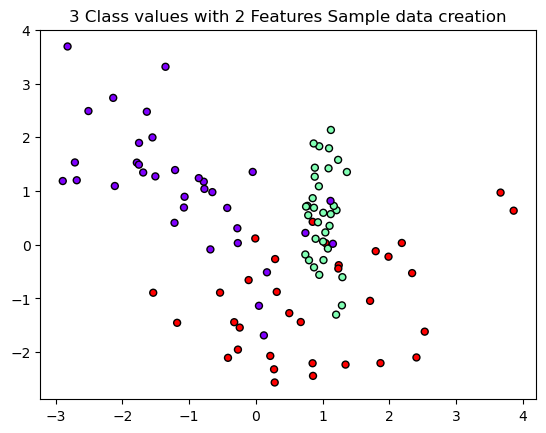

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

plt.show()

- **2)** X_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습하겠습니다

In [5]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    plt.show()

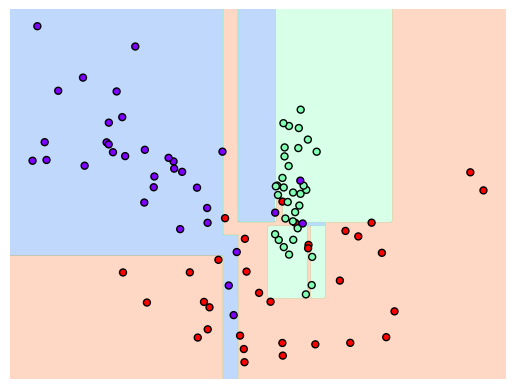

In [6]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

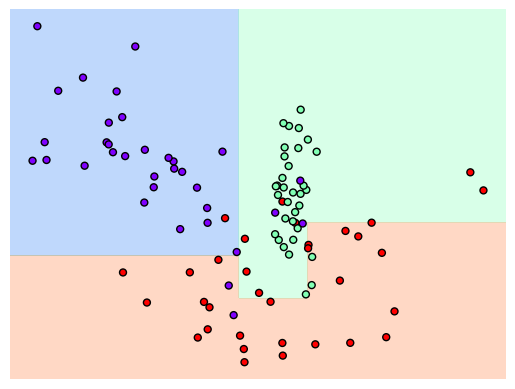

In [7]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 4.3 앙상블 학습

## 앙상블 학습 개요

- 앙상블 학습의 유형은 전통적으로 보팅, 배깅, 부스팅의 3가지로 나눌 수 있다


    - 1) **보팅(Voting)**
        - 서로 다른 알고리즘(로지스틱, KNN, SVM 등)의 예측을 합쳐 최종 결론을 냄
        - 하드 보팅: 다수결로 라벨 결정, 소프트 보팅: 클래스 확률 평균 후 최대값 선택
    - 2) **배깅(Bagging)**
        - 같은 알고리즘(대개 결정트리)을 여러 개 만들고 각 모델에 부트스트랩 샘플을 주어 병렬로 학습
        - 예: 랜덤 포레스트(특징 무작위 선택 + 다수결)
    - 3) **부스팅(Boosting)**
        - 약한 모델(얕은 트리 등)을 순차적으로 학습하며 앞 단계가 틀린 샘플에 가중치를 더 줘 점점 보완
        - 예: AdaBoost, Gradient Boosting, XGBoost, LightGBM

## 보팅 유형 - 하드 보팅과 소프트 보팅

<img src="./pics/4.3.png">

## 보팅 분류기 (Voting Classifier)

- 효과:
    - 안정성 제고: 상이한 모델의 편향과 분산 특성이 상호 보완되어 예측의 변동성이 완화된다
    - 정확도 향상: 단일 모델 대비 일반화 성능이 개선되는 경우가 빈번하다
    - 구현 용이성: 이질적 모델 조합이 가능하며 비교적 적은 튜닝으로도 효과를 기대할 수 있다
- 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공하고 있다

# 4.4 랜덤 포레스트

## 랜덤 포레스트 개요 및 실습

- 배깅의 대표적인 알고리즘은 랜덤 포레스트다
- 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다

<img src="./pics/4.4.png" width=700>

- 각 트리는 부트스트랩 샘플(전체 데이터에서 복원추출)로 만든 서브셋으로 따로 학습한다
- 서브셋의 표본 수는 같지만(원본과 동일 크기), 중복이 있어 일부 샘플은 여러 번 어떤 샘플은 한 번도 안 들어갈 수 있다
- 예: 원본이 10개이고 n_estimators=3이면 서브셋 3개를 뽑아 트리 3개를 학습 → 분류는 다수결, 회귀는 평균으로 최종 예측

<img src="./pics/4.4.1.png">

In [8]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [9]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9223


## 랜덤 포레스트 하이퍼 파라미터 및 투닝

- 트리 기반 앙상블 알고리즘의 단점: 하이퍼파라미터가 많아 튜닝 시간이 길다. 트리 고유 파라미터까지 더해지면 다른 ML 알고리즘보다 조정 항목이 상대적으로 많다.
- 핵심 하이퍼파라미터:
    - n_estimators: 트리 개수(기본 10). 많이 설정할수록 좋은 성능 보장되지 않고 학습 수행 시간도 오래 걸린다
    - max_features: 분할 시 참조할 특성 수. auto/sqrt가 기본
    - max_depth, min_samples_leaf, min_samples_split: 과적합 완화를 위한 트리 제약

GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해 보겠습니다.

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , np.ravel(y_train))

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9172


In [12]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9162


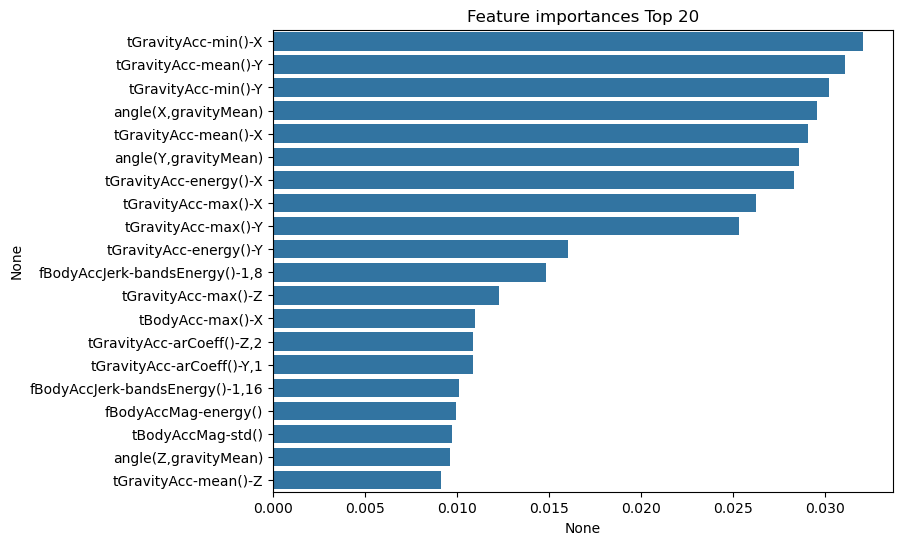

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

# 4.5 GBM (Gradient Boosting Machine)

## GBM의 개요 및 실습

- 부스팅 알고리즘: 여러 개의 약한 학습기 (weak learner)를 순차적으로 학습-예측하면서 예측한 데이터 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 부스팅의 대표적 구현은: AdaBoost & Gradient Boost Machine

<img src="./pics/adaboost.png" width="700">

<img src="./pics/gbm.png" width="700">

## GBM 하이퍼 파라미터 소개

- loss: 최적화할 손실 함수를 지정한다. 분류는 보통 deviance, 회귀는 제곱오차 등 문제에 맞게 선택한다.
- learning_rate: 단계별 업데이트 크기다. 값이 작을수록 더 많은 단계가 필요하고 과적합 억제에 유리해 n_estimators와 균형을 맞춘다.
- n_estimators: 누적할 약한 학습기 수다. 늘리면 성능이 좋아질 수 있으나 과도하면 과적합과 학습 시간이 증가한다.
- subsample: 단계별로 사용할 훈련 샘플 비율이다. 전체를 쓰면 결정론적, 일부만 쓰면 무작위화로 과적합 완화 효과가 있다.

# 4.6 XGBoost (eXtra Gradient Boost)

## XGBoost 개요

- XGBoost는 GMB에 기반하고 있지만 느린 GBM의 단점인 (1)느린 수행 + (2) 과적합 규제 문제를 해결해서 각광을 받고 있다
- 병렬 CPU 환경에서 병렬 학습이 가능, 핵심 라이브러리는 C/C++로 작성됨
- XGBoost 설치 (MacOS):
  - 터미널에서 `conda install -c anaconda py-xgboost` 명령어를 입력하고 Proceed([y]/n)?에서 y를 입력

In [14]:
import xgboost

print(xgboost.__version__)

3.0.1


## 파이썬 래퍼 XGBoost 하이퍼파라미터

- 하이퍼 파라미터 유형:
    - 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없다
    - 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭 한다
    - 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터이다 

##  파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [15]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [21]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [22]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [23]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

In [27]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list, verbose_eval=False )

In [28]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.776 0.058 0.975 1.    0.999 0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [30]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC:0.9965


<Figure size 640x480 with 0 Axes>

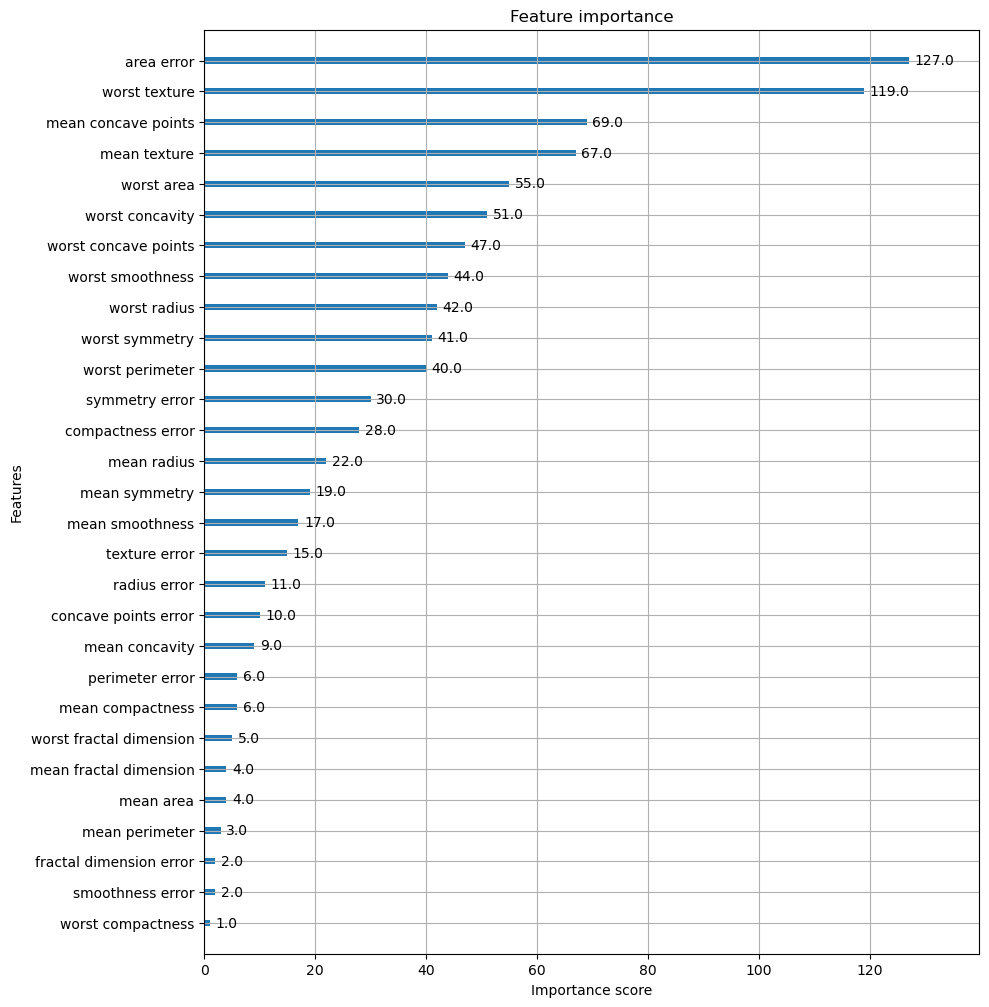

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.show()